# Lesson 8 Assignment - SupervisedLearning
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

### Instructions
1. Short narrative on the data preparation for your chosen data set for Milestone 3, which in most cases should be the same as Milestone 2.
2. Import statements for necessary package(s).
3. Read in the dataset from a freely and easily available source on the internet.
4. Show data preparation. Normalize some numeric columns, one-hot encode some categorical columns with 3 or more categories, remove or replace missing values, remove or replace some outliers.
5. Ask a binary-choice question that describes your classification. Write the question as a comment. Specify an appropriate column as your expert label for a classification (include decision comments).
6. Apply K-Means on some of your columns, but make sure you do not use the expert label. Add the K-Means cluster labels to your dataset.
7. Split your data set into training and testing sets using the proper function in sklearn (include decision comments).
8. Create a classification model for the expert label based on the training data (include decision comments).
9. Apply your (trained) classifiers to the test data to predict probabilities.
10. Write out to a csv a dataframe of the test data, including actual outcomes, and the probabilities of your classification.
11. Determine accuracy rate, which is the number of correct predictions divided by the total number of predictions (include brief preliminary analysis commentary).
12. Add comments to explain the code blocks.
14. Add a summary comment block that discusses your classification.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.preprocessing as preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from copy import deepcopy

import warnings

warnings.filterwarnings("ignore") # To suppress warning for violin plots when python version is < 3.7

%matplotlib inline

In [2]:
# Adult Data Set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
Adults = pd.read_csv(url, header=None)

# Find proper column names here:
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Adults.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
               'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain',
               'capital-loss', 'hours-per-week', 'native-country', 'income']

# Turn off warning generated from 'Chained assignment' (https://www.dataquest.io/blog/settingwithcopywarning/)
pd.set_option('mode.chained_assignment', None)

# Declare Functions

In [3]:
# Function to replace outliers
def replace_outlier(array):
    # The high limit for acceptable values is the mean plus 2 standard deviations 
    LimitHi = np.mean(array) + 2*np.std(array)
    # The low limit for acceptable values is the mean plus 2 standard deviations
    LimitLo = np.mean(array) - 2*np.std(array)
    #  Create Flag for values outside limits 
    FlagBad = (array < LimitLo) | (array > LimitHi)
    
    # FlagGood is the complement of FlagBad
    FlagGood = ~FlagBad
    # Replace outleiers with the mean of non-outliers
    array[FlagBad] = np.mean(array[FlagGood])
    # Return array result
    return array

In [4]:
# Function to replace missing numeric values
def replace_missing_value(x, col):
    # We determine the locations of the question marks
    QuestionMark = x.loc[:, col].astype(str) == "?"
    # If there are question marks
    if sum(QuestionMark) > 0:
        # Convert the current column to numeric data including nans
        x.loc[:, col] = pd.to_numeric(x, errors='coerce')
        # Get the Nan array from the current column
        HasNan = np.isnan(x.loc[:, col]) 
        # Calculate the Median for current column without Nan
        Median = np.nanmedian(x.loc[:, col])
        # Replace the missing value with Median
        x.loc[HasNan, col] = Median
    return x.loc[:, col]

# Code
Based on Milestone 2, I choosed the Adult Data Set from UCI Machine Learning Repository
Data preparation comprised of:
- Import data and convert to pandas's data frame with the appropriate column names
- Replace missing values with Median for current column without Nan
- Replace the outliers with Median for current column
- Normalize numeric values using Z-Normalize from scikit lean package
- Impute missing categories
- One-hot encode categorical data for sex and income columns
- Remove obsolete columns

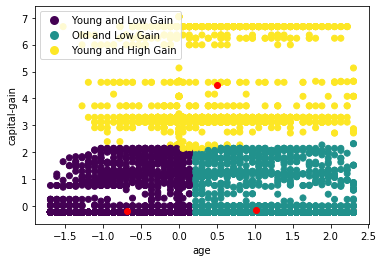




Logistic regression classifier

coefficients:
[[ 4.74487947e-01  8.07606671e-06  2.17331680e-02  5.45091440e-01
   0.00000000e+00 -1.24447808e-02 -5.24680674e-01  0.00000000e+00]]
intercept:
[-0.69830759]
predictions for test set:
[0 0 0 ... 0 0 0]
probabilities of the classification:
[[0.89021664 0.10978336]
 [0.87846496 0.12153504]
 [0.8254981  0.1745019 ]
 ...
 [0.72866417 0.27133583]
 [0.71766062 0.28233938]
 [0.70417824 0.29582176]]
actual class values:
       income>50K
22278           0
8950            0
7838            0
16505           0
19140           1
...           ...
13561           1
25189           0
9580            0
13176           1
27266           0

[10746 rows x 1 columns]
accuracy rate: 0.3878065551226221


In [5]:
# Normalize numeric values using Z-Normalize
for col in ['age', 'fnlwgt', 'capital-gain', 'capital-loss']:
    # Replace missing values with Median for current column without Nan
    Adults.loc[:, col] = replace_missing_value(Adults, col).astype(float)
    # Replace the outliers (if exists) by calling "replace_outlier" funtion
    Adults.loc[:, col] = replace_outlier(Adults.loc[:, col]).astype(float)
    X = pd.DataFrame(Adults.loc[:,col])
    # Normalization numeric data using Z-Normalize by scikit library
    standardization_scale = preprocessing.StandardScaler().fit(X)
    z = standardization_scale.transform(X)
    Adults.loc[:,col] = z
    
# Impute missing categories
# Trim string (some daata has ? with spaces)
Adults.replace('(^\s+|\s+$)', '', regex=True, inplace=True)
    
MissingValue = Adults.loc[:, "workclass"] == "?"
Adults.loc[MissingValue, "workclass"] = "Private"

MissingValue = Adults.loc[:, "occupation"] == "?"
Adults.loc[MissingValue, "occupation"] = "Other-service"

MissingValue = Adults.loc[:, "native-country"] == "?"
Adults.loc[MissingValue, "native-country"] = "Unknown"

# One-hot encode categorical data
Adults.loc[:, "Female"] = (Adults.loc[:, "sex"] == "Female").astype(int)
Adults.loc[:, "Male"] = (Adults.loc[:, "sex"] == "Male").astype(int)
Adults.loc[:, "income<=50K"] = (Adults.loc[:, "income"] == "<=50K").astype(int)
Adults.loc[:, "income>50K"] = (Adults.loc[:, "income"] == ">50K").astype(int)

# Remove obsolete columns
Adults = Adults.drop("sex", axis=1)
Adults = Adults.drop("income", axis=1)

# Prediction task is to determine whether a person makes over 50k a year.
# This is a binary-choice question with two classification output: Yes & No (1 and 0)
# The column used as an target outcome is "income>50K" (expert label) whch is binary column.
# income>50K = 1 (This means the person is make >50K per year)
# income>50K = 0 (This means the person is make <=50K per year)

# Perform K-Means with sklearn using age & capital-gain attributes
# Note: both attributes have been normalized using Z-Normalize from above script
k = 3
clusterDataFrame = pd.DataFrame(Adults,columns=['age', 'capital-gain']) # generated a new data frame for k-means
kmeans = KMeans(n_clusters=k).fit(clusterDataFrame)
Labels = kmeans.labels_ # get Labels of each point
ClusterCentroids = kmeans.cluster_centers_ # get coordinates of cluster centers

# Add the cluster label to the dataset
Adults.loc[:, "cluster_label"] = Labels

# Nice way to get the indices of the points for each corresponding cluster
# Note: label is come from my judgement of the cluster relationship between age and capital gain
labels=['Young and Low Gain', 'Old and Low Gain', 'Young and High Gain']

# Plot scatter between age(x-axis) and capital-gain (y-axis)
sc = plt.scatter(clusterDataFrame.loc[:, 'age'], clusterDataFrame.loc[:, 'capital-gain'], c=Labels.astype(int))
# Plot Centroids
plt.scatter(ClusterCentroids[:, 0], ClusterCentroids[:, 1], c='red')
plt.xlabel('age')
plt.ylabel('capital-gain')
# Add legend for the label's color
lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(81), mec="none",
                        label=labels[i], ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(Labels.astype(int))]
plt.legend(handles=handles)
plt.show()

ratio = 0.33 # ratio of test data over all data (ratio = 1/3 based on the specification from adult.name file)
targetOutcome = pd.DataFrame(Adults,columns=['income>50K']) # target outcome column (The task is to predict if the person make >50K per year )
# The chosen input attribute columns (Numeric and Categorical data)
allInputs = pd.DataFrame(Adults,columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'Female', 'Male'])
X, XX, Y, YY = train_test_split(allInputs, targetOutcome, test_size = ratio, random_state = 0)
# X = training features
# XX = testing features
# Y = training targets
# YY = testing targests

# CLASSIFICATION MODELS
# The reason why I choose Logistic Regression because it is the go-to method for binary classification problems. 
# (https://machinelearningmastery.com/logistic-regression-for-machine-learning/)
print ('\n\n\nLogistic regression classifier\n')
C_parameter = 50. / len(X) # parameter for regularization of the model
class_parameter = 'ovr' # parameter for dealing with multiple classes
penalty_parameter = 'l1' # parameter for the optimizer (solver) in the function
solver_parameter = 'saga' # optimization system used
tolerance_parameter = 0.1 # termination parameter

#Training the Model
clf = LogisticRegression(C=C_parameter, multi_class=class_parameter, penalty=penalty_parameter, solver=solver_parameter, tol=tolerance_parameter)
clf.fit(X, Y.values.ravel()) # It is equivalent to reshape(-1, order=order). (Return a contiguous flattened array)
# x = np.array([[1, 2, 3], [4, 5, 6]])
# print(np.ravel(x))
# [1 2 3 4 5 6]
print ('coefficients:')
print (clf.coef_) # each row of this matrix corresponds to each one of the classes of the dataset
print ('intercept:')
print (clf.intercept_) # each element of this vector corresponds to each one of the classes of the dataset

# Apply the Model
print ('predictions for test set:')
prediction = clf.predict(XX)
print (prediction)
print ('probabilities of the classification:')
print (clf.predict_proba(XX))
print ('actual class values:')
print (YY)

# Counter to hold the number of correct predictions
number_of_correct_prediction = 0
for i in range(len(prediction)):
    if YY.iloc[i, 0] == prediction[i]:
        number_of_correct_prediction += 1
        
# accuracy rate (number of correct predictions divided by the total number of predictions)
print (f'accuracy rate: {number_of_correct_prediction/len(X)}')

# Export test DataFrame to csv file, including actual outcomes, and the probabilities of the classification
Results = pd.DataFrame()
Results = deepcopy(XX)
Results.loc[:,"actual_outcome"] = YY.loc[:, 'income>50K']
Results.loc[:,"probabilities_output_will_be_0"] = clf.predict_proba(XX)[:,0]
Results.loc[:,"probabilities_output_will_be_1"] = clf.predict_proba(XX)[:,1]
Results.to_csv('Predictive-Analytics-Dataset.csv', sep=",", index=False)